In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
from keras.datasets import mnist

In [4]:
train_data, test_data = mnist.load_data()

In [5]:
X_train,y_train = train_data
X_test,y_test = test_data

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
x_train.shape

(60000, 784)

In [9]:
y_train.shape

(60000,)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
y_train.shape

(60000, 10)

In [12]:
from keras.models import load_model

In [13]:
saved_model = load_model("DigitPredictor.keras")

In [23]:
np.argmax(saved_model.predict(x_test[0].reshape(1,-1)))

1/1 [==============================] - 0s 44ms/step


7

(10000, 784)

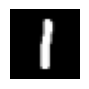

In [43]:
plt.figure(figsize=(1,1))
plt.imshow(x_test[135].reshape(28,28),cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig("Figures/one.png",bbox_inches='tight',pad_inches=0, dpi=1000)
plt.show()

In [20]:
model = Sequential(
    [
        Dense(256,activation='sigmoid',input_shape=(784,)),
        Dense(128,activation='sigmoid'),
        Dense(10,activation='softmax')
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from keras.callbacks import EarlyStopping

In [25]:
early_stopping = EarlyStopping(monitor="val_accuracy",min_delta=0.001,restore_best_weights=True,patience=3)

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1194 - accuracy: 0.9636 - val_loss: 0.1063 - val_accuracy: 0.9665
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0823 - accuracy: 0.9749 - val_loss: 0.0879 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0825 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0738 - val_accuracy: 0.9778
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0743 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0706 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0642 - val_ac

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0642 - accuracy: 0.9812


[0.06420326232910156, 0.9811999797821045]

In [29]:
model.save("DigitPredictor.keras")